Introduction:

Automobiles are the single most common method of personal transportation and travel in the United States. As such, car accidents are one of the most important public safety concerns throughout the country, as they impact nearly all Americans – drivers, passengers, and pedestrians alike. Each of the millions of accidents that occur each year has the potential to result in substantial human, economic, environmental, and social costs. Understanding why accidents occur, and the risk factors behind severe and fatal accidents, is essential for designing safer road infrastructure, drafting more effective transportation policy, and allocating emergency response resources more efficiently. 

Analysis of the patterns behind traffic accidents is made possible by the existence of large scale, comprehensive, nation-wide traffic datasets for the United States. The size and scope of these datasets allow for the exploration of the effects of environmental conditions and road context on crash outcomes, as well as cross-regional/state comparisons. In this project tutorial, we will investigate trends in the U.S. Accidents Dataset (2016-2023), created by Sobhan Moosavi and his research partners. This is one of the largest publicly available transportation safety datasets for the U.S., with nearly eight million records collected from a number of transportation and law-enforcement agencies, and will enable us to answer some important guiding questions.

First of all, we would like to explore which environmental or temporal factors contribute (and contribute the most) to severe automobile accidents. A number of authoritative sources on road safety – from the National Highway Traffic Safety Administration to state-level Departments of Transportation – all suggest taking more extreme precautions when driving in bad weather or at night. However, does reduced visibility actually correlate with more severe accidents? Are night-time crashes more likely to be severe ones? Which of these two factors increases the risk of having a severe accident more?
Another important question is cross-regional comparisons. Road infrastructure, road safety standards and regulations, speed-limits, and consumer choices (e.g. buying larger personal automobiles) all vary across the various U.S. states. Thus, it seems important to ask if some states experience disproportionately more severe road accidents. For example, are crashes in Texas, with its higher speed limits and higher proportion of large vehicles, more severe than crashes in other states like California?
We can also explore how machine learning can help us in identifying risk factors. Could machine learning help us uncover hidden patterns or build predictive models for automobile accident severity?
Each of these inquiries represent important topics of interest for many stakeholders across the U.S. – from policy-makers and planners to insurance companies and drivers. By putting this dataset through the full data science pipeline, we aim to find meaningful insights and patterns that can improve our understanding of automobile accident severity and road safety in the United States.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.DataFrame()
try:
    import kagglehub
    from kagglehub import KaggleDatasetAdapter
except ImportError:
    print("kagglehub not found. Run pip install kagglehub in your terminal")

try:
    file_path = "US_Accidents_March23.csv"
    print("Downloading dataset from Kaggle...")
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "sobhanmoosavi/us-accidents",
        file_path
    )
    print("Dataset loaded from Kaggle.")
except Exception as e:
    print(e)
    
print("========== DATA OVERVIEW ==========")
print("Shape:", df.shape)
print("Columns:", list(df.columns))
print("\nPreview of dataset:")
print(df.head(), "\n")

df = df.dropna(axis=1, thresh=len(df)*0.5)
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()

print("========== SUMMARY STATISTICS ==========")
print(df.describe(), "\n")

plt.figure(figsize=(8,4))
df['Severity'].value_counts().sort_index().plot(kind='bar')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.show()

monthly_counts = df.groupby('Month')['ID'].count()
plt.figure(figsize=(8,4))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

week_counts = (
    df.groupby('Weekday')['ID']
    .count()
    .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
)
plt.figure(figsize=(8,4))
plt.bar(week_counts.index, week_counts.values)
plt.title('Accidents by Day of Week')
plt.xlabel('Weekday')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

print("========== HYPOTHESIS TEST ==========")
subset = df.query("State == 'CA'")
other = df.query("State == 'TX'")
t_stat, p_val = stats.ttest_ind(
    subset['Severity'], other['Severity'],
    equal_var=False, nan_policy='omit'
)
print(f"T-test: Severity in CA vs TX\nStatistic = {t_stat:.4f}, p-value = {p_val:.4e}\n")

print("========== CORRELATION MATRIX ==========")
corr = df[numeric_cols].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Numeric Feature Correlation Heatmap')
plt.show()

z_scores = np.abs(stats.zscore(df[numeric_cols].dropna()))
outliers = (z_scores > 3).sum().sum()
print("========== OUTLIER ANALYSIS ==========")
print(f"Estimated number of outlier values: {outliers:,}")
print("=======================================")

100%|██████████| 653M/653M [03:05<00:00, 3.69MB/s] 

Extracting files...


Reading: C:\Users\thfal\.cache\kagglehub\datasets\sobhanmoosavi\us-accidents\versions\13\US_Accidents_March23.csv
Dataset loaded.
========== DATA OVERVIEW ==========
Shape: (7728394, 46)
Columns: ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)'] ...
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0      39.87     -84.06      NaN      NaN          0.01  ...      False   
1      39.93     -82.83      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   

  C

In [7]:
print("~~~ BASIC STRUCTURE ~~~")
print("Shape:", df.shape)
print("Columns:", list(df.columns))
print("\n")

print("~~~ MISSING VALUES ~~~")
print(df.isnull().sum().sort_values(ascending=False).head(20))
print("\n")

print("~~~ UNIQUE VALUE COUNTS (top 20 columns with fewest unique values) ~~~")
print(df.nunique().sort_values().head(20))
print("\n")

print("~~~ TOP STATES BY ACCIDENT COUNT ~~~")
print(df['State'].value_counts().head(10))
print("\n")

print("~~~ TOP WEATHER CONDITIONS ~~~")
print(df['Weather_Condition'].value_counts().head(10))
print("\n")

print("~~~ SEVERITY DISTRIBUTION ~~~")
print(df['Severity'].value_counts(normalize=True).sort_index() * 100)
print("\n")

print("~~~ CORRELATION WITH SEVERITY (NUMERIC FEATURES) ~~~")
corrs = df.select_dtypes(include=np.number).corr()['Severity'].sort_values(ascending=False)
print(corrs.head(10))
print(corrs.tail(10))
print("\n")

print("~~~ TIME ANALYSIS ~~~")
print("Accidents per Year:\n", df['Year'].value_counts().sort_index())
print("\nAccidents per Month:\n", df['Month'].value_counts().sort_index())
print("\nAccidents per Weekday:\n", df['Weekday'].value_counts())
print("\n")

print("~~~ EXTREME VALUES ~~~")
print("Max Temperature:", df['Temperature(F)'].max())
print("Min Temperature:", df['Temperature(F)'].min())
print("Max Wind Speed:", df['Wind_Speed(mph)'].max())
print("Max Distance:", df['Distance(mi)'].max())
print("Mean Distance:", df['Distance(mi)'].mean())
print("\n")

print("~~~ NUMERIC SUMMARY ~~~")
print(df.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].round(2))


~~~ BASIC STRUCTURE ~~~
Shape: (7728394, 46)
Columns: ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


~~~ MISSING VALUES ~~~
End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather

KeyError: 'Year'

~~~ BASIC STRUCTURE ~~~
Shape: (7728394, 50)
Columns: ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year', 'Month', 'Hour', 'Weekday']


~~~ MISSING VALUES ~~~
Start_Time               743166
Weekday                  743166
Year                     743166
Month                    743166
Hour                     743166
Wind_Direction           175206
Weather_Condition        173459
Weather_Timestamp        120228
Sunrise_Sunset            23246
Astronomical_Twilight     23246
Nautical_Twilight         23246
Civil_Twilight            23246
Airport_Code              22635
Street                    10869
Timezone                   7808
Zipcode                    1915
City                        253
Description                   5
Country                       0
State                         0
dtype: int64


~~~ UNIQUE VALUE COUNTS (top 20 columns with fewest unique values) ~~~
Country                  1
Turning_Loop             1
Amenity                  2
Bump                     2
Civil_Twilight           2
Sunrise_Sunset           2
Traffic_Signal           2
Crossing                 2
Railway                  2
Stop                     2
Station                  2
Roundabout               2
Junction                 2
No_Exit                  2
Give_Way                 2
Traffic_Calming          2
Astronomical_Twilight    2
Nautical_Twilight        2
Source                   3
Severity                 4
dtype: int64


~~~ TOP STATES BY ACCIDENT COUNT ~~~
State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: count, dtype: int64


~~~ TOP WEATHER CONDITIONS ~~~
Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Name: count, dtype: int64


~~~ SEVERITY DISTRIBUTION ~~~
Severity
1     0.871669
2    79.667017
3    16.812510
4     2.648804
Name: proportion, dtype: float64


~~~ CORRELATION WITH SEVERITY (NUMERIC FEATURES) ~~~
Severity           1.000000
End_Lng            0.121178
Start_Lat          0.069060
End_Lat            0.056135
Start_Lng          0.052862
Pressure(in)       0.042152
Wind_Speed(mph)    0.035751
Distance(mi)       0.034787
Humidity(%)        0.022079
Hour               0.018479
Name: Severity, dtype: float64
Wind_Speed(mph)      0.035751
Distance(mi)         0.034787
Humidity(%)          0.022079
Hour                 0.018479
Precipitation(in)    0.009159
Visibility(mi)      -0.002804
Month               -0.015949
Temperature(F)      -0.019966
Wind_Chill(F)       -0.041381
Year                -0.232329
Name: Severity, dtype: float64


~~~ TIME ANALYSIS ~~~
Accidents per Year:
 Year
2016.0     410821
2017.0     717290
2018.0     893426
2019.0     954302
2020.0    1161598
2021.0    1412433
2022.0    1268806
2023.0     166552
Name: count, dtype: int64

Accidents per Month:
 Month
1.0     652682
2.0     585606
3.0     501362
4.0     526210
5.0     505614
6.0     524750
7.0     463263
8.0     547206
9.0     593815
10.0    630325
11.0    695612
12.0    758783
Name: count, dtype: int64

Accidents per Weekday:
 Weekday
Friday       1237229
Thursday     1196137
Wednesday    1195864
Tuesday      1177923
Monday       1108807
Saturday      579153
Sunday        490115
Name: count, dtype: int64


~~~ EXTREME VALUES ~~~
Max Temperature: 207.0
Min Temperature: -89.0
Max Wind Speed: 1087.0
Max Distance: 441.75
Mean Distance: 0.5618422831523753


~~~ NUMERIC SUMMARY ~~~
                                            mean        std  \
Severity                                2.212384   0.487531   
Start_Time         2020-03-21 21:49:59.056443136        NaN   
Start_Lat                              36.201195   5.076079   
Start_Lng                             -94.702545  17.391756   
End_Lat                                36.227339   3.945038   
End_Lng                               -92.336331  14.075809   
Distance(mi)                            0.561842   1.776811   
Temperature(F)                         61.712827  18.814027   
Wind_Chill(F)                          59.220749  19.347678   
Humidity(%)                            64.879915  22.564686   
Pressure(in)                           29.544829   0.997913   
Visibility(mi)                          9.111221   2.660819   
Wind_Speed(mph)                         7.634823   5.223725   
Precipitation(in)                        0.00601   0.093272   
Year                                 2019.701283   1.888793   
Month                                   6.747753   3.623057   
Hour                                   12.267794   5.455518   

                                   min                            25%  \
Severity                           1.0                            2.0   
Start_Time         2016-01-14 20:18:33  2018-09-17 02:20:31.750000128   
Start_Lat                      24.5548                      33.399631   
Start_Lng                  -124.623833                    -117.219396   
End_Lat                      24.566013                      35.186481   
End_Lng                    -124.545748                     -93.323463   
Distance(mi)                       0.0                            0.0   
Temperature(F)                   -89.0                           50.0   
Wind_Chill(F)                    -89.0                           52.0   
Humidity(%)                        1.0                           49.0   
Pressure(in)                       0.0                          29.38   
Visibility(mi)                     0.0                           10.0   
Wind_Speed(mph)                    0.0                            5.0   
Precipitation(in)                  0.0                            0.0   
Year                            2016.0                         2018.0   
Month                              1.0                            4.0   
Hour                               0.0                            8.0   

                                          50%                  75%  \
Severity                                  2.0                  2.0   
Start_Time         2020-06-23 13:37:23.500000  2021-10-28 15:44:07   
Start_Lat                           35.823974            40.084959   
Start_Lng                          -87.766616           -80.353676   
End_Lat                             36.183495            37.517262   
End_Lng                             -88.02789           -84.990476   
Distance(mi)                             0.03                0.464   
Temperature(F)                           64.0                 76.0   
Wind_Chill(F)                            62.0                 71.0   
Humidity(%)                              67.0                 84.0   
Pressure(in)                            29.86                30.03   
Visibility(mi)                           10.0                 10.0   
Wind_Speed(mph)                           7.0                 10.0   
Precipitation(in)                         0.0                  0.0   
Year                                   2020.0               2021.0   
Month                                     7.0                 10.0   
Hour                                     13.0                 17.0   

                                   max  
Severity                           4.0  
Start_Time         2023-03-31 23:30:00  
Start_Lat                    49.002201  
Start_Lng                   -67.113167  
End_Lat                         49.075  
End_Lng                     -67.109242  
Distance(mi)                    441.75  
Temperature(F)                   207.0  
Wind_Chill(F)                    207.0  
Humidity(%)                      100.0  
Pressure(in)                     58.63  
Visibility(mi)                   140.0  
Wind_Speed(mph)                 1087.0  
Precipitation(in)                36.47  
Year                            2023.0  
Month                             12.0  
Hour                              23.0  

Trimmed visibility outside [0.5, 10.0] mi — removed 81,838 rows.
Pearson correlation:  r = -0.0146, p-value = 0.000e+00
Spearman correlation: r = -0.0162, p-value = 0.000e+00


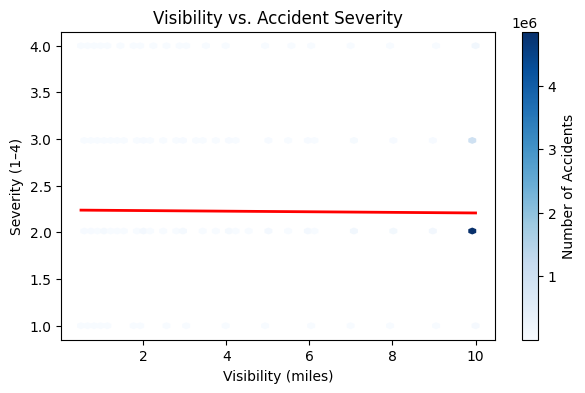

In [ ]:
# Correlation analysis between visibility and accident severity

from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
corr_df = df[['Visibility(mi)', 'Severity']].dropna().copy()
corr_df['Severity'] = pd.to_numeric(corr_df['Severity'], errors='coerce')
corr_df = corr_df.dropna()

lo, hi = corr_df['Visibility(mi)'].quantile([0.01, 0.99])
trim = corr_df[(corr_df['Visibility(mi)'] >= lo) & (corr_df['Visibility(mi)'] <= hi)]
removed = len(corr_df) - len(trim)
print(f"Trimmed visibility outside [{lo:.1f}, {hi:.1f}] mi — removed {removed:,} rows.")

pearson_r, pearson_p = pearsonr(trim['Visibility(mi)'], trim['Severity'])
spearman_r, spearman_p = spearmanr(trim['Visibility(mi)'], trim['Severity'])

print(f"Pearson correlation:  r = {pearson_r:.4f}, p-value = {pearson_p:.3e}")
print(f"Spearman correlation: r = {spearman_r:.4f}, p-value = {spearman_p:.3e}")

plt.figure(figsize=(7,4))
hb = plt.hexbin(trim['Visibility(mi)'], trim['Severity'], gridsize=60, cmap='Blues', mincnt=1)
plt.colorbar(label='Number of Accidents')
plt.xlabel('Visibility (miles)')
plt.ylabel('Severity (1–4)')
plt.title('Visibility vs. Accident Severity')

x = trim['Visibility(mi)'].to_numpy()
y = trim['Severity'].to_numpy()
b1, b0 = np.polyfit(x, y, 1)
xline = np.linspace(x.min(), x.max(), 100)
plt.plot(xline, b1 * xline + b0, color='red', linewidth=2)
plt.show()
